In [18]:
# 1. Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [19]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('../../Datasets/NVDA Historical Data.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4026.188, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4037.269, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4022.565, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4023.536, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4038.571, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4023.907, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4023.880, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4025.857, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4024.833, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.135 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [21]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [22]:
# Quá trình Training
train_data = df[:train_size+test_size]
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8376.881, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8382.291, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8380.912, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8380.726, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8380.641, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8378.719, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8378.484, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8380.771, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8380.451, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8382.327, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8381.965, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8380.330, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8375.170, Time=1.42 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8374.687, Time=1.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [23]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [24]:
# Quá trình Training
train_data = df
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9809.348, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9824.360, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9825.860, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9825.831, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9826.343, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9828.084, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9827.956, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9820.601, Time=1.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9826.929, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9823.689, Time=1.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9828.637, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9812.821, Time=1.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.84 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] interc

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [25]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[428.29793643 428.55346719 427.39059215 425.71248995 424.65926241
 424.93702616 426.44048239 428.36667246 429.72230854 429.90723217
 429.03361639 427.81475822 427.11562087 427.4456764  428.68936411
 430.21351882 431.26528774 431.4127454  430.77212634 429.90505209
 429.46647715 429.82207784 430.85702575 432.07351437 432.90203648
 433.03345834 432.57963995 431.98151839 431.73405662 432.09817909]


In [26]:
# 7. Đánh giá độ chính xác validate, test
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mape(y_test, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)
valid_mape = mape(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
# print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)
# print("Testing MAPE:", test_mape)

print('Validation RMSE:', valid_rmse)
# print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
# print("Validation MAPE:", valid_mape)

Testing RMSE: 60.11507884915108
Testing MAE: 43.673947309555
Testing MAPE: 20.28378795675579
Validation RMSE: 132.16747883192116
Validation MAE: 108.9784795167689
Validation MAPE: 42.06286436789979


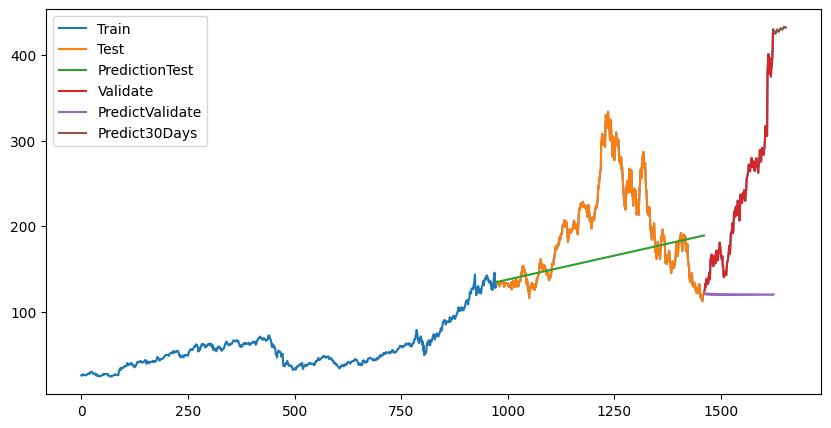

In [27]:
# 9.Vẽ hình
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'PredictionTest','Validate','PredictValidate','Predict30Days'])
plt.show()

In [28]:
test_data.index

RangeIndex(start=974, stop=1461, step=1)